In [23]:
import requests

# Set up the URL with your API key as a query parameter
api_key = "frScHw79NCgZNrAvUXIBFoJntYfGobvadNnnEQp4"
url = f"https://developer.nrel.gov/api/nsrdb/v2/solar/full-disc-download.json?api_key={api_key}"

# Define the payload with modified attributes
payload = {
    "attributes": "ghi,dni,dhi",  # Adjusted attributes list
    "names": "2022",  # Specify year
    "utc": "true",  # Use UTC timestamps
    "leap_day": "true",  # Include leap day
    "interval": "30",  # Interval in minutes
    "email": "manmeet.singh@utexas.edu",  # Email to send notification when ready
    "wkt": "POINT(-179.99 -15.94)"  # Coordinates in WKT format
}

# Set headers (optional, depends on server requirements)
headers = {
    'Content-Type': "application/x-www-form-urlencoded",
    'Cache-Control': "no-cache"
}

# Send the POST request
response = requests.post(url, data=payload, headers=headers)

# Print the response text
print(response.text)


{"inputs":{"body":{"attributes":"ghi,dni,dhi","names":"2022","utc":"true","leap_day":"true","interval":"30","email":"manmeet.singh@utexas.edu","wkt":"POINT(-179.99 -15.94)"},"params":{},"query":{}},"metadata":{"version":"2.0.0","resultset":{"count":1}},"status":200,"outputs":{"message":"File generation in progress. An email will be sent to manmeet.singh@utexas.edu when the download is ready.","downloadUrl":"https://mapfiles.nrel.gov/data/solar/fd04c3a10fb35ca7df7ef8e340a8cfb4.zip"},"errors":[]}


In [26]:
!pip install geemap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.3 MB/s eta 0:00:00


In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import ee
import os

# Set the path to the service account key file
service_account = 'editor@ee-manmeet20singh15-wbis.iam.gserviceaccount.com'
key_file = 'drive/MyDrive/earth_engine/ee-manmeet20singh15-wbis-fab7f1ca35e0.json'

# Use the service account for authentication
credentials = ee.ServiceAccountCredentials(service_account, key_file)
ee.Initialize(credentials)

In [33]:
import geemap
import ee

ghi = ee.Image('projects/earthengine-legacy/assets/projects/sat-io/open-datasets/global_solar_atlas/ghi_LTAy_AvgDailyTotals')

In [34]:
!pip install timm
!pip install wxee

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00


In [35]:
import ee
import wxee
# wxee.Initialize()
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import Compose, ToTensor, Resize
from PIL import Image
import os
import numpy as np
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.checkpoint as checkpoint
from timm.models.layers import DropPath, to_2tuple, trunc_normal_
import numpy as np
import xarray as xr

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import Compose, ToTensor, Resize
from PIL import Image
import os
import numpy as np
from torch.utils.tensorboard import SummaryWriter

In [37]:
lons, lone, lats, late = -97.7431 - 2.5, -97.7431+2.5, 30.2672-2.5, 30.2672+2.5

aoi = ee.Geometry.Polygon(
    [[[lons, lats],
        [lone, lats],
        [lone, late],
        [lons, late]]])
aoi

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              -100.2431,
              27.7672
            ],
            [
              -95.2431,
              27.7672
            ],
            [
              -95.2431,
              32.7672
            ],
            [
              -100.2431,
              32.7672
            ]
          ]
        ]
      },
      "evenOdd": {
        "constantValue": true
      }
    }
  }
})

In [46]:
# Define bounding box for the contiguous United States
lons, lone, lats, late = -125.0, -66.93457, 24.396308, 49.384358

# Define the area of interest (AOI) as a polygon covering the US
aoi = ee.Geometry.Polygon(
    [[[lons, lats],
      [lone, lats],
      [lone, late],
      [lons, late]]]
)


In [47]:
coords = aoi.coordinates().getInfo()[0]
coords

[[-125, 24.396308],
 [-66.93457, 24.396308],
 [-66.93457, 49.384358],
 [-125, 49.384358],
 [-125, 24.396308]]

In [48]:
ghi = ghi.set('system:time_start', 0)
ds_ghi = ghi.wx.to_xarray(region=aoi.bounds(), scale=1000)

EEException: Total request size (103456320 bytes) must be less than or equal to 50331648 bytes.

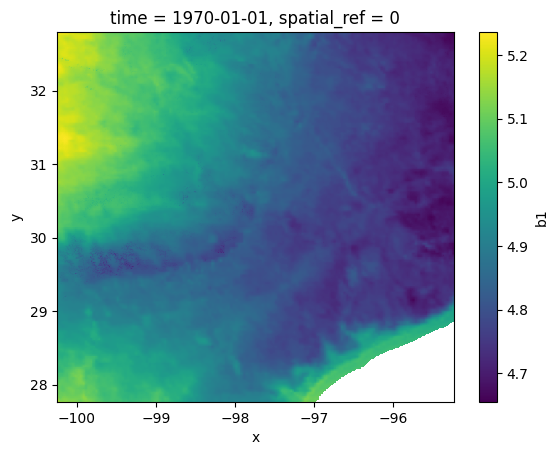

In [42]:
ds_ghi.b1.plot()

In [43]:
ds_ghi

<xarray.Dataset> Size: 1MB
Dimensions:      (time: 1, x: 558, y: 560)
Coordinates:
  * time         (time) datetime64[ns] 8B 1970-01-01
  * x            (x) float64 4kB -100.2 -100.2 -100.2 ... -95.26 -95.25 -95.24
  * y            (y) float64 4kB 32.79 32.78 32.78 32.77 ... 27.79 27.78 27.77
    spatial_ref  int64 8B 0
Data variables:
    b1           (time, y, x) float32 1MB 5.216 5.219 5.222 ... nan nan nan
Attributes:
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    AREA_OR_POINT:           Area
    _FillValue:              -32768.0
    scale_factor:            1.0
    add_offset:              0.0

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/ghi_overlay.png'

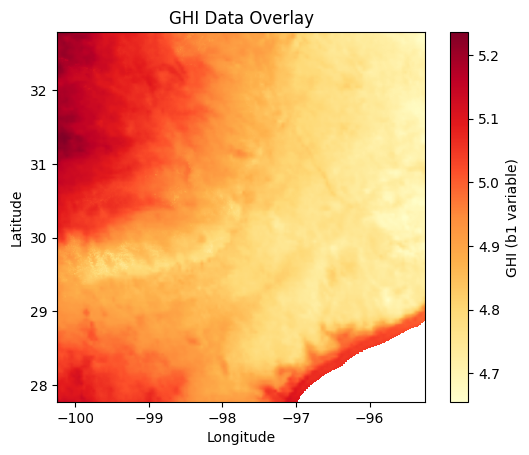

In [45]:
import xarray as xr
import numpy as np
import folium
import matplotlib.pyplot as plt

# Assume ds_ghi is already loaded as shown in your description
ds_ghi = ds_ghi.squeeze()  # Remove the time dimension if it's a single value

# Extract necessary components
latitude = ds_ghi['y'].values
longitude = ds_ghi['x'].values
data_values = ds_ghi['b1'].values

# Set up a Folium map centered on the midpoint of the data
center_lat = np.mean(latitude)
center_lon = np.mean(longitude)
m = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=7,
    tiles="Stamen Terrain",
    attr="Map tiles by Stamen Design, CC BY 3.0 — Map data © OpenStreetMap"
)

# Create a meshgrid for the coordinates
lon_grid, lat_grid = np.meshgrid(longitude, latitude)

# Plot the data and save it as an image for folium overlay
plt.imshow(data_values, origin='upper', extent=(longitude.min(), longitude.max(), latitude.min(), latitude.max()), cmap="YlOrRd")
plt.colorbar(label='GHI (b1 variable)')
plt.title('GHI Data Overlay')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('/mnt/data/ghi_overlay.png')

# Add image overlay to folium map
overlay = folium.raster_layers.ImageOverlay(
    name="GHI Overlay",
    image='/mnt/data/ghi_overlay.png',
    bounds=[[latitude.min(), longitude.min()], [latitude.max(), longitude.max()]],
    opacity=0.6,
)

overlay.add_to(m)
folium.LayerControl().add_to(m)

# Display map
m

In [49]:
# Define bounds for three regions
lons_w, lone_w = -125.0, -105.0  # Western third
lons_c, lone_c = -105.0, -85.0   # Central third
lons_e, lone_e = -85.0, -66.93457  # Eastern third
lats, late = 24.396308, 49.384358  # Latitude bounds (same for all regions)

# Define AOI for Western US
aoi_west = ee.Geometry.Polygon(
    [[[lons_w, lats],
      [lone_w, lats],
      [lone_w, late],
      [lons_w, late]]]
)

# Define AOI for Central US
aoi_central = ee.Geometry.Polygon(
    [[[lons_c, lats],
      [lone_c, lats],
      [lone_c, late],
      [lons_c, late]]]
)

# Define AOI for Eastern US
aoi_east = ee.Geometry.Polygon(
    [[[lons_e, lats],
      [lone_e, lats],
      [lone_e, late],
      [lons_e, late]]]
)

# Request GHI data for each region separately
ghi_west = ghi.wx.to_xarray(region=aoi_west.bounds(), scale=1000)
ghi_central = ghi.wx.to_xarray(region=aoi_central.bounds(), scale=1000)
ghi_east = ghi.wx.to_xarray(region=aoi_east.bounds(), scale=1000)

Downloading:   0%|          | 0.00/8.64M [00:00<?, ?iB/s]

Downloading:   0%|          | 0.00/7.69M [00:00<?, ?iB/s]

Downloading:   0%|          | 0.00/4.89M [00:00<?, ?iB/s]

In [50]:
# Merge GHI datasets (assuming you have xarray or a similar package)
import xarray as xr

ghi_combined = xr.merge([ghi_west, ghi_central, ghi_east])  # or [ghi_west, ghi_east] if using two parts

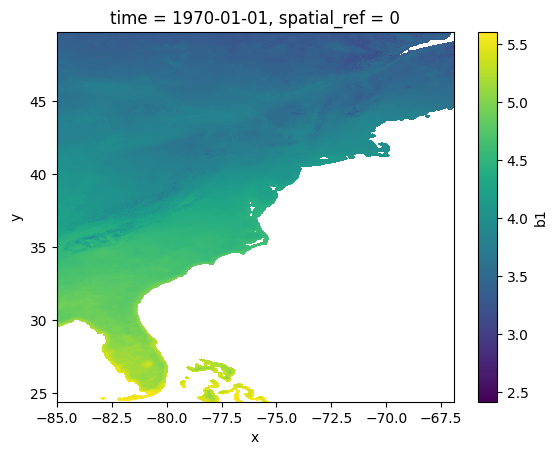

In [56]:
ghi_east.b1.plot()

In [57]:
# Define bounding box for Texas
lons, lone, lats, late = -106.6456, -93.5083, 25.8371, 36.5007

# Define the area of interest (AOI) as a polygon covering Texas
aoi = ee.Geometry.Polygon(
    [[[lons, lats],
      [lone, lats],
      [lone, late],
      [lons, late]]]
)

In [58]:
ghi_texas = ghi.wx.to_xarray(region=aoi.bounds(), scale=1000)

Downloading:   0%|          | 0.00/2.57M [00:00<?, ?iB/s]

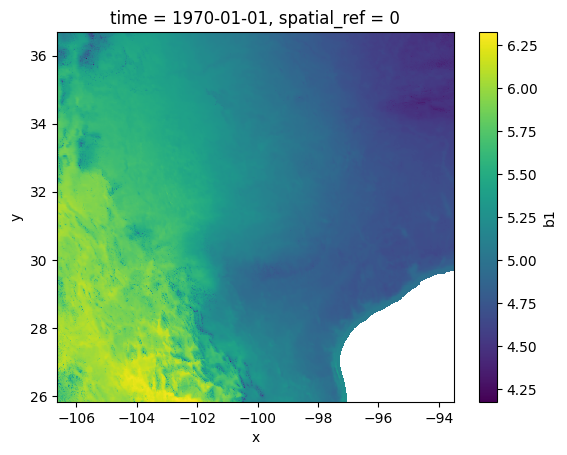

In [59]:
ghi_texas.b1.plot()

In [60]:
ghi_texas.to_netcdf('ghi_texas.nc')

In [61]:
!ls

drive  ghi_texas.nc  sample_data


In [62]:
ghi_texas

<xarray.Dataset> Size: 7MB
Dimensions:      (time: 1, x: 1463, y: 1208)
Coordinates:
  * time         (time) datetime64[ns] 8B 1970-01-01
  * x            (x) float64 12kB -106.6 -106.6 -106.6 ... -93.53 -93.52 -93.51
  * y            (y) float64 10kB 36.68 36.67 36.66 36.66 ... 25.86 25.85 25.84
    spatial_ref  int64 8B 0
Data variables:
    b1           (time, y, x) float32 7MB 5.214 5.206 5.184 ... nan nan nan
Attributes:
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    AREA_OR_POINT:           Area
    _FillValue:              -32768.0
    scale_factor:            1.0
    add_offset:              0.0